# **机器学习公开课 - 数据竞赛制胜法宝：集成学习**
## Day 1：GBDT梯度提升树的应用

> 节选自《2021机器学习实战》正课<br>
> 作者：@菜菜TsaiTsai<br>
> 版本号：2021/11/03 V1<br>

## 0 课程规划

欢迎来到为期三天的《数据竞赛制胜法宝：集成学习》公开课。在这门课程中，我将用三天时间带你熟悉3个经典集成算法、并了解简单的模型融合方式。基于开课之前的投票结果，这门课程将偏向代码实践、而不是理论详解的方向，当你完成这门课程时，你将能够自由应用GBDT、XGB和LGBM三种算法进行建模和参数调整。如果想系统地学习集成算法的具体理论，则可以向客服小可爱咨询正课《2021机器学习实战》。

**DAY 1：集成学习与梯度提升树GBDT**

**DAY 2：改进提升树：XGBoost与LGBM**

**DAY 3：模型融合：Voting在电商数据集上的应用**

为掌握这门课程，你需要先掌握：
- Python基础 >> 《九天老师的Python基础》<br>https://www.bilibili.com/video/BV1U54y1W7jw?spm_id_from=333.999.0.0

- 基础机器学习算法（决策树的建树过程）与随机森林 >> 《2021机器学习实战公开课》<br>https://www.bilibili.com/video/BV1f3411r7EP?share_source=copy_web

In [ ]:
import sklearn
import matplotlib as mlp
import numpy as np
import pandas as pd
import re

In [ ]:
for package in [sklearn,mlp,np,pd]:
    print(re.findall("([^']*)",str(package))[2],package.__version__)

sklearn 1.0.1
matplotlib 3.3.2
numpy 1.19.2
pandas 1.1.3


In [ ]:
#pip install --upgrade scikit-learn
#conda update scikit-learn

## 一 集成学习与Boosting

集成学习（Ensemble learning）是机器学习中最先进、最有效、最具研究价值的领域之一，这类方法会训练多个弱评估器、并将它们以某种方式结合起来解决一个问题。

在过去十年中，人工智能相关产业蓬勃发展，计算机视觉、自然语言处理、语音识别等领域不断推陈出新、硕果累累，但热闹是深度学习的，机器学习好似什么也没有。2012年之后，传统机器学习占据的搜索、推荐、翻译、各类预测领域都被深度学习替代或入侵，在招聘岗位中，69%的岗位明确要求深度学习技能，传统机器学习算法在这一场轰轰烈烈的人工智能热潮当中似乎有些被冷落了。

在人工智能大热的背后，集成学习就如同裂缝中的一道阳光，凭借其先进的思想、优异的性能杀出了一条血路，成为当代机器学习领域中最受学术界和产业界青睐的领域。

从今天的眼光来看，集成学习是：

- **当代工业应用中，唯一能与深度学习算法分庭抗礼的算法**<br><br>
- **数据竞赛高分榜统治者，KDDcup、Kaggle、天池、DC冠军队御用算法**<br><br>
- **在搜索、推荐、广告等众多领域，事实上的工业标准和基准模型**<br><br>
- **任何机器学习/深度学习工作者都必须掌握其原理、熟读其思想的领域**<br>

在集成学习的发展历程中，集成的思想以及方法启发了众多深度学习和机器学习方面的工作，在学术界和工业界都取得了巨大的成功。今天，集成学习可以被分为三个主要研究领域：

- **模型融合**<br>
    模型融合在最初的时候被称为“分类器结合”，这个领域主要关注强评估器，试图设计出强大的规则来融合强分类器的结果、以获取更好的融合结果。这个领域的手段主要包括了投票法Voting、堆叠法Stacking、混合法Blending等，且被融合的模型需要是强分类器。<br><br>
- **弱分类器集成**<br>
    弱分类器集成主要专注于对传统机器学习算法的集成，这个领域覆盖了大部分我们熟悉的集成算法和集成手段，如装袋法bagging，提升法boosting。这个领域试图设计强大的集成算法、来将多个弱学习器提升成为强学习器。<br><br>
- **混合专家模型**（mixture of experts）<br>
    混合专家模型常常出现在深度学习（神经网络）的领域。在其他集成领域当中，不同的学习器是针对同一任务、甚至在同一数据上进行训练，但在混合专家模型中，我们将一个复杂的任务拆解成几个相对简单且更小的子任务，然后针对不同的子任务训练个体学习器（专家），然后再结合这些个体学习器的结果得出最终的输出。

**在《2021机器学习》正课当中，我们会对前两个方面的内容进行详细的说明，在《2021PyTorch深度学习》正课当中，我们会对混合专家模型的状况进行说明**。在本次3天直播课当中，我们将涉及到三个集成算法：GBDT、XGB与LGBM的应用，以及基础融合模型方法的讲解。

从原理上来说，每个boosting算法的具体细节是非常复杂的。在实践中，算法构成的原理往往决定了算法类的超参数，因此我们通常需要先学习原理，再了解应用。在本次公开课的课前投票当中，大家倾向于主讲应用和代码，因此本次课程我们将重点讲解算法的应用，仅仅简单涉及到原理部分。

![投票结果](https://skojiangdoc.oss-cn-beijing.aliyuncs.com/2021MachineLearning/Ensembles/Public/%E5%BE%AE%E4%BF%A1%E5%9B%BE%E7%89%87_20211105182318.jpg)

****

# **零、GBDT梯度提升树的应用**

GBDT全称为Gradient Boosting Decision Tree，译作梯度提升树，也常常被跌坐Gradient Boosting Machine(GBM)，它是提升法中的代表性算法，也是工业界应用最多的机器学习算法。提升法boosting是一类弱分类器集成方法，它与以随机森林为代表的装袋法有很大的区别。在随机森林中，我们一次性建立多个平行独立的弱评估器，并让所有评估器并行运算。在boosting中，我们会逐一建立弱评估器、并且上一个弱评估器的输出结果会影响下一个弱评估器的建立。具体地来说，新评估器是在之前的弱评估器的基础上迭代优化生成的，因此弱评估器之间高度相关。

![RF2](https://pictes.oss-cn-beijing.aliyuncs.com/%E5%BE%AE%E8%AF%BE%20-%20sklearn/RFC/RF2.png)

巧合的是，正如boosting算法中弱评估器是逐步迭代生成的，boosting的各个算法之也存在着“逐步迭代”、相互借鉴的关系，更先进的算法往往以经典和传统算法为基础。因此在学习boosting算法时，我们需要由浅到深、循序渐进地学习。

Boosting领域的开山算法是AdaBoost，它确立了提升法三要素：
- 损失函数$L(x,y)$
- 弱评估器$f(x)$
- 综合集成规则

依赖于上面三要素，AdaBoost还确定了boosting算法的基本训练流程：**依据上一个弱评估器$f(x)_{t-1}$的结果，计算损失函数$L(x,y)$，并以最小化$L(x,y)$为目标影响下一个弱评估器$f(x)_t$的构建**。现代几乎所有的Boosting算法都遵循这个流程，但每个算法使用不同的方式来**影响**后续评估器的构建。

|年份|算法/理论|成就/改进|
|----|----|-----|
|1988|General Boosting|先前的弱评估器上预测错误的样本应该在后续得到更多关注|
|1997|AdaBoost|从0到1，首次在工程上实现了boosting理论<br>确立了决策树作为弱评估器，生长规则为C4.5<br>自适应地**调整数据分布**<br>自适应地**计算每个弱分类器的权重**|
|2000|GBDT<br>在ADB基础上改进|更新损失函数$L(x,y)$，在数学流程上推广到任意可微函数<br>放弃调整数据分布、放弃弱分类器权重<br>自适应地调整**后续弱评估器拟合的目标**|
|2014|XGBoost<br>在GBDT基础上改进|更新损失函数$L(x,y)$，在损失函数中加入正则项<br>改进弱评估器$f(x)$生长规则，自适应地**调整后续弱评估器的结构**<br>改进拟合中的数学过程，提升拟合精度<br>首次在工程上实现了boosting树的并行，提升运算速度<br>支持GPU加速|
|2016|LGBM<br>在GBDT基础上改进<br>受XGBoost启发|改进弱评估器$f(x)$生长规则，自适应地**调整后续弱评估器的结构**<br>设计了适合于GBDT的数据分布调整方式GOSS，自适应地**调整数据分布**<br>设计了加速弱分类器分枝的计算方式EFB，在工程上大幅度降低了运算时间与内存消耗<br>支持GPU加速|
|2017|CatBoost<br>在GBDT基础上改进<br>受XGBoost启发|改进弱评估器$f(x)$生长规则，自适应地调整**后续弱评估器的结构**<br>设计了适用于梯度下降的弱分类器权重调整方式，自适应地调整**弱分类器的权重**<br>改进离散型变量的分枝方式，提升拟合精度<br>支持GPU加速|

不难发现，算法中具体的操作细节还是比较复杂的，我们将在《2021机器学习实战》中系统地讲解以上提到的每个集成算法。幸运的是，即便我们不太了解具体的计算细节，只要能够大概概括每个关键参数如何影响模型的结果，我们还是能够学习算法实践的代码的。

作为工业界应用最广泛的算法之一，GBDT在众多机器学习算法库中都可以调用，包括pGBRT，scikit-learn，基于R语言的gbm、基于Spark的MLlib等，其中基于Python最常用的就是scikit-learn中的梯度回归树与梯度分类树。**与随机森林不同，boosting算法中所有的弱评估器都是回归树**，因此boosting集成算法的初始版本也一定都是回归算法，分类算法只是在回归输出的基础上加上sigmoid或者softmax函数构建的。

我们先来看梯度回归树的类：

*class* `sklearn.ensemble.GradientBoostingRegressor`(*, loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

我们可以通过从ensemble模块中导入来使用它：

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

In [ ]:
str_ = "loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0"

In [ ]:
len(str_.split(","))

21

这个类总共包含21个参数，其中大部分参数都与弱评估器、以及基于弱评估器实现的各种抗过拟合手段有关。在sklearn中，所有的参数都有默认值，所以即便在完全不了解参数含义的前提下，我们还是可以应用GBDT算法，但我们将无法控制算法的结果和训练方向。**树的集成模型由于原理复杂、涉及到的过程繁琐，因此在参数调整上有很大的空间**。在正式课程中我们会详细地梳理所有有用的参数，在直播课中我们重点来讲解那些GBDT运行所必须的参数。

|参数相关的流程|参数|
|----|----|
|损失函数|**loss, alpha**|
|集成规则|init, subsample, **learning_rate**|
|弱评估器|**n_estimators, criterion**|
|弱评估器（抗过拟合）|min_samples_split, min_samples_leaf, min_weight_fraction_leaf,<br>**max_depth**, min_impurity_decrease, max_features, max_leaf_nodes, ccp_alpha|
|训练流程（结果监控）|verbose|
|训练流程（提前停止）|validation_fraction, n_iter_no_change, tol|
|训练流程（增量学习）|warm_start|
|随机性控制|random_state|

- **n_estimators与learning_rate**

n_estimators是GDBT迭代的次数，也是最终训练完毕的算法中树的棵树，默认值为100。通常来说，n_estimators越大，模型的学习能力就越强，训练集上的分数也会更高。但相对的，n_estimators越多，训练的速度也会越慢，需要的时间也计算资源也会更多，过拟合的可能性也会更大，因此n_estimators往往是我们调参的第一对象。

**当树的尺寸被控制得很小的时候，基于树的集成模型是非常不容易过拟合的**。因此boosting算法也有着能够抵抗过拟合的美誉，因此只要计算资源足够，我们可以放心大胆地给boosting算法更多的树数量。即便真的出现了过拟合的情况，我们也可以通过控制过拟合的参数来对模型进行调整。

In [ ]:
data = pd.read_csv(r"I:\公开课sample_data1.csv",index_col=0) #200w - 4w

In [ ]:
data.head()

,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,magic_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,30000.0,97200.0,20000.0,0.0,0.0,0.0,160500.0,80392.0,12000.0,0.0,...,0,0,0,0,0,0,44.666667,0.99,1,0.99
1,1111744.0,1137687.0,491331.0,790208.0,77000.0,0.0,1457249.0,708483.0,217455.0,162987.0,...,1,1,1,6,6,6,199.333333,2.97,3,4.96
2,249050.0,173248.0,70841.0,117012.0,55000.0,0.0,206366.0,82205.0,29902.0,88064.0,...,0,0,0,0,0,0,109.333333,12.97,3,12.97
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,127.833333,0.99,1,0.99
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,203.166667,0.99,1,0.99


In [ ]:
data.shape 

(45988, 107)

In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1] #标签是游戏氪金玩家的氪金数额

In [ ]:
#模型实例化（填写参数），fit训练，.score()

In [ ]:
reg = GBR(n_estimators = 100) #实例化

In [ ]:
reg = reg.fit(X,y) #训练过程

In [ ]:
reg.score(X,y) #在训练好的数据上的R2

In [ ]:
from time import time

In [ ]:
for i in range(50,550,50): #[50,100,150,....500]
    start = time() #开始时间的记录
    model = GBR(n_estimators=i,random_state=1412)
    model.fit(X,y)
    print("estimators:{},\tR2:{:.3f}%,\tTime:{:.3f}".format(i,model.score(X,y)*100,time()-start))

estimators:50,	R2:75.448%,	Time:17.664
estimators:100,	R2:80.529%,	Time:35.425
estimators:150,	R2:83.924%,	Time:52.730
estimators:200,	R2:86.109%,	Time:70.167
estimators:250,	R2:87.777%,	Time:86.490
estimators:300,	R2:88.954%,	Time:105.768
estimators:350,	R2:89.854%,	Time:124.521
estimators:400,	R2:90.730%,	Time:141.694
estimators:450,	R2:91.366%,	Time:161.836
estimators:500,	R2:91.999%,	Time:180.230


learning_rate则是学习率（又称之为步长），它则是控制每棵树增长的“速度”的关键参数。也是boosting算法的参数当中，经常能够帮助结果大幅度提升的参数。在boosting算法当中，一个样本在集成算法中的输出值总是等于这个样本在所有树上的输出值的加权平均：
<br>
<center>$\hat{y_i} = \sum{wf(x_i)}$</center>
<br>
其中$f(x)$表示单一的树上输出的结果。在迭代过程当中，我们持续地在求解输出的$\hat{y_i}$，假设现在集成算法中总共有了$k$棵树，在建立第$(k+1)$棵新的树时，我们的输出结果可以表示为：
<br>
<center>$\hat{y_i}^{(k+1)} = \hat{y_i}^{(k)} + \eta f_{k+1}(x_i)$</center><br>

其中$f_{k+1}(x_i)$树前乘的常数就是学习率$\eta$。不难发现，$\eta$直接作用于树的迭代过程，并且一定程度上决定了新建立的树可以有多大程度影响最终的输出。

**当学习率较大时，每棵树在迭代中的作用就更大，算法迭代得快，只需要较少的树就可以快速达到模型的极限附近。当学习率较小时，情况则完全相反**。因此大学习率常常和小的n_estimators一起使用，相对的，如果将学习率设置得比较小，n_estimators也需要更多。

![](https://pictes.oss-cn-beijing.aliyuncs.com/%E5%BE%AE%E8%AF%BE%20-%20sklearn/week%2011%20XGBoost/eta.PNG)

根据经验，一个较小的学习率和一个较大的树的数量，可以让模型的预测结果提升，例如：

In [ ]:
for i in np.linspace(0.01,0.2,10):
    start = time()
    model = GBR(n_estimators=300,learning_rate=i,random_state=1412)
    model.fit(X,y)
    print("learningrate:{:.3f},\tR2:{:.3f}%,\tTime:{:.3f}".format(i,model.score(X,y)*100,time()-start))

learningrate:0.010,	R2:71.510%,	Time:106.836
learningrate:0.031,	R2:79.401%,	Time:108.110
learningrate:0.052,	R2:83.885%,	Time:109.747
learningrate:0.073,	R2:86.905%,	Time:109.161
learningrate:0.094,	R2:88.539%,	Time:109.393
learningrate:0.116,	R2:89.765%,	Time:108.999
learningrate:0.137,	R2:90.916%,	Time:108.193
learningrate:0.158,	R2:92.008%,	Time:108.893
learningrate:0.179,	R2:92.351%,	Time:109.254
learningrate:0.200,	R2:92.808%,	Time:108.346


In [ ]:
#random_state，max_depth, max_features

- **loss**与**alpha**

loss用于指定待优化的损失函数。<br>
字符串型，可输入{‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}，默认值='squared_error'

其中'squared_error'是指回归的平方误差，'absolute_error'指的是回归的绝对误差，这是一个鲁棒的损失函数。'huber'是以上两者的结合。'quantile'则表示使用分位数回归中的弹球损失pinball_loss。对任意样本$i$而言，$y_i$为真实标签，$\hat{y_i}$为预测标签，则各个损失的表达式为：

平方误差：$\sum{(y_i - \hat{y_i})^2}$<br><br>
绝对误差：$\sum{|y_i - \hat{y_i}|}$<br><br>

huber损失：$\sum{l(x_i,y_i)}$，其中$l = \begin{split} 
\begin{cases}\frac{1}{2}(y_i - \hat{y_i})^2, & |y_i - \hat{y_i}|\leq\alpha \\
\alpha(|y_i - \hat{y_i}|-\frac{\alpha}{2}),& |y_i - \hat{y_i}|>\alpha \end{cases}\end{split}, \space \space \alpha \in (0, 1)$<br><br>

quantile损失：$\sum{l(x_i,y_i)}$，其中$l = \begin{split} 
\begin{cases}
    \alpha (y_i - \hat{y_i}), & y_i - \hat{y_i} > 0 \\
    0,    & y_i - \hat{y_i} = 0 \\
    (1-\alpha) (y_i - \hat{y_i}), & y_i - \hat{y_i} < 0
\end{cases}\end{split}, \space \space \alpha \in (0, 1)$

其中$\alpha$是需要我们自己设置的超参数。在huber损失中，alpha是阈值，在quantile损失中，alpha用于辅助计算损失函数的输出结果，默认为0.9。

**<font color=red>===更新警告===</font>**<br>
在sklearn1.0版本及后续版本当中，损失函数"ls"与"lad"被删除了，其中"ls"的功能被"squared_error"取代，而"lad"被"absolute_error"取代。如果你在运行代码时，发现你的参数默认值、参数名称与课件中不相同，或者在运行过程中出现报错、警告等现象，你可能需要更新你的sklearn。

- 为什么要设置这么多不同的损失函数？

GBDT是工业应用最广泛的模型，工业数据大部分都极度偏态、具有长尾，因此GBDT必须考虑**离群值**带来的影响。数据中的离群值会极大程度地影响模型地构建，当离群值在标签当中、而我们是依赖于减小损失函数来逐渐构建算法时，这种影响会前所未有地大。**因此Boosting是天生更容易被离群值影响的模型、也更擅长学习离群值的模型。**<br><br>
![](https://discourse-cloud-file-uploads.s3.dualstack.us-west-2.amazonaws.com/business6/uploads/analyticsvidhya/original/1X/c3af040fef3ddc8f2bb1b393d71700e9a638426e.PNG)
![](https://discourse-cloud-file-uploads.s3.dualstack.us-west-2.amazonaws.com/business6/uploads/analyticsvidhya/original/1X/f3c5885defae011dd385462f1f3812ff24393105.PNG)

## 根据离群值选择损失函数
举例来说，若离群值的标签为1000，大部分正常样本的标签在0.1~0.2之间，算法一定会异常努力地学习离群值的规律，因为将离群值预测错误会带来巨大的损失。在这种状况下，最终迭代出的算法可能是严重偏离大部分数据的规律的。同样，我们也会遇见很多离群值对我们很关键的业务场景：例如，电商中的金额离群用户可能是VIP用户，风控中信用分离群的用户可能是高风险用户，这种状况下我们反而更关注将离群值预测正确。不同的损失函数可以帮助我们解决不同的问题——

- **当高度关注离群值、并且希望努力将离群值预测正确时，选择MSE**<br><br>
这在工业中是大部分的情况。在实际进行预测时，离群值往往比较难以预测，因此离群样本的预测值和真实值之间的差异一般会较大。MSE作为预测值和真实值差值的平方，会放大离群值的影响，会让算法更加向学习离群值的方向进化，这可以帮助算法更好地预测离群值。

- **努力排除离群值的影响、更关注非离群值的时候，选择MAE**<br><br>
MAE对一切样本都一视同仁，对所有的差异都只求绝对值，因此会保留样本差异最原始的状态。相比其MSE，MAE对离群值完全不敏感，这可以有效地降低GBDT在离群值上的注意力。

- **试图平衡离群值与非离群值、没有偏好时，选择Huber或者Quantileloss**<br><br>
Huberloss损失结合了MSE与MAE，在Huber的公式中，当预测值与真实值的差异大于阈值时，则取绝对值，小于阈值时，则取平方。在真实数据中，部分离群值的差异会大于阈值，部分离群值的差异会小于阈值，因此比起全部取绝对值的MAE，Huberloss会将部分离群值的真实预测差异求平方，相当于放大了离群值的影响（但这种影响又不像在MSE那样大）。因此HuberLoss是位于MSE和MAE之间的、对离群值相对不敏感的损失。

<center>huber损失：$\sum{l(x_i,y_i)}$，其中$l = \begin{split} 
\begin{cases}\frac{1}{2}(y_i - \hat{y_i})^2, & |y_i - \hat{y_i}|\leq\alpha \\
\alpha(|y_i - \hat{y_i}|-\frac{\alpha}{2}),& |y_i - \hat{y_i}|>\alpha \end{cases}\end{split}, \space \space \alpha \in (0, 1)$</center><br>

我们可以从离群值所占的损失比例来直观地看到上面的结论。具体地说，**当算法在离群值上预测错误时，MSE损失中离群值所占的比例最大、Huber或Quantile居中，MAE上离群值所占的比例最小**，离群值上的损失越小，离群值的损失越难以主导整个迭代过程。

In [2]:
import numpy as np 
y_true = np.concatenate((np.linspace(-1,1,450),np.linspace(9,10,50))) #含有50个离群值
y_pred = np.linspace(-1,1,500) #预测结果忽略了离群值，会导致离群值上的损失很大

In [ ]:
def huber_loss(y_true, y_pred, alpha=0.9):
    #对huber_loss，alpha位于(0,1)之间，一般是更靠近1的方向，默认0.9或者0.99
    error = y_true - y_pred
    #error小于等于阈值（如果True，则计算，如果False则直接为0）
    l1 = (abs(error)<=alpha)*error**2/2
    #error大于阈值
    l2 = (abs(error)>alpha)*alpha*(abs(error)-alpha/2)
    return  (l1+l2).sum()

In [ ]:
def squared_error(y_true,y_pred):
    #注意这里不是MSE，而是TSE
    l = (y_true - y_pred)**2
    return l.sum()

def absolute_error(y_true,y_pred):
    #不是MAE，而是TAE
    l = abs(y_true - y_pred)
    return l.sum()

In [ ]:
for name,error in [("对离群值最敏感的SE\t",squared_error)
               , ("对离群值一般敏感的Huber\t",huber_loss)
               , ("对离群值完全不敏感的AE\t",absolute_error)]:
    loss = error(y_true,y_pred)
    abratio = error(y_true[451:],y_pred[451:])/loss
    print(name,"总损失为{:.3f}，离群值损失占总损失的占比为{:.3f}%".format(loss,abratio*100))

对离群值最敏感的SE	 总损失为3705.280，离群值损失占总损失的占比为98.024%
对离群值一般敏感的Huber	 总损失为369.684，离群值损失占总损失的占比为97.298%
对离群值完全不敏感的AE	 总损失为475.000，离群值损失占总损失的占比为88.782%


在sklearn中应用算法的三步走：**实例化，训练(fit)，输出评估分数/预测结果**

In [ ]:
#========【TIME WARNING：2mins】=========#
reg = GBR(loss="squared_error")
reg = reg.fit(X,y)
reg.score(X,y) #r2作为回归算法的默认评估指标

0.8052885629122227

In [ ]:
reg = GBR(loss="huber")
reg = reg.fit(X,y)
reg.score(X,y) #r2作为回归算法的默认评估指标

0.49445542747410565

**<font color=red>===更新警告===</font>**<br>
在sklearn1.0版本及后续版本当中，损失函数"ls"与"lad"被删除了，其中"ls"的功能被"squared_error"取代，而"lad"被"absolute_error"取代。如果你在运行代码时，发现你的参数默认值、参数名称与课件中不相同，或者在运行过程中出现报错、警告等现象，你可能需要更新你的sklearn。

In [ ]:
import sklearn
import matplotlib as mlp
import numpy as np
import pandas as pd
import re

In [ ]:
for package in [sklearn,mlp,np,pd]:
    print(re.findall("([^']*)",str(package))[2],package.__version__)

sklearn 1.0.1
matplotlib 3.3.2
numpy 1.19.2
pandas 1.1.3


In [ ]:
#pip install --upgrade scikit-learn
#conda update scikit-learn

# **一、 XGBoost**

XGBoost全称Extreme Gradient Boosting，译为极致提升树或极限提升树，它是卡耐基梅隆大学的助理教授Tianqi Chen在GBDT基础上改进后的算法，也是所提升集成算法中最成功的算法之一。

与GBDT一样，XGBoost遵循boosting算法的基本训练流程：**依据上一个弱评估器$f(x)_{t-1}$的结果，计算损失函数$L(x,y)$，并以最小化$L(x,y)$为目标影响下一个弱评估器$f(x)_t$的构建**，因此xgboost很自然的也会有学习率、损失函数、树的数量这些参数。不同于GBDT的是，XGBoost在提升三要素：损失函数$L(x,y)$、弱评估器$f(x)$以及集成规则上都做出了许多改变，这些改变使得XGBoost比GBDT运算更快、精度更高、并且更不容易过拟合，在许多时候，我们都发现XGBoost的预测结果比GBDT更好。

|年份|算法/理论|成就/改进|
|----|----|-----|
|2000|GBDT<br>在ADB基础上改进|更新损失函数$L(x,y)$，在数学流程上推广到任意可微函数<br>放弃调整数据分布、放弃弱分类器权重<br>自适应地调整**后续弱评估器拟合的目标**|
|2014|XGBoost<br>在GBDT基础上改进|更新损失函数$L(x,y)$，在损失函数中加入正则项<br>改进弱评估器$f(x)$生长规则，自适应地**调整后续弱评估器的结构**<br>改进拟合中的数学过程，提升拟合精度<br>首次在工程上实现了决策树分枝的并行，提升运算速度<br>支持GPU加速|

陈天奇创造了XGBoost之后，很快和一群机器学习爱好者建立了专门调用XGBoost库，名为xgboost。xgboost是一个独立的，开源的，专门提供梯度提升树以及XGBoost算法应用的算法库。这个库需要我们单独下载和安装：

In [ ]:
#!pip install xgboost #安装xgboost库
#!pip install --upgrade xgboost #更新xgboost库

In [ ]:
import xgboost as xgb

In [ ]:
xgb.__version__

'1.5.0'

我们有两种方式可以来使用我们的xgboost库。第一种方式，是直接使用xgboost库自己的建模流程。

![](https://pictes.oss-cn-beijing.aliyuncs.com/%E5%BE%AE%E8%AF%BE%20-%20sklearn/week%2011%20XGBoost/xgb%E5%BB%BA%E6%A8%A1%E6%B5%81%E7%A8%8B.PNG)

其中最核心的，是DMatrix这个读取数据的类，以及train()这个用于训练的函数。与sklearn把所有的参数都写在类中的方式不同，xgboost库中必须先使用字典设定参数集，再使用train来将参数及输入，然后进行训练。

*class* `xgboost.DMatrix`(data, label=None, *, weight=None, base_margin=None, missing=None, silent=False, feature_names=None, feature_types=None, nthread=None, group=None, qid=None, label_lower_bound=None, label_upper_bound=None, feature_weights=None, enable_categorical=False)

*function* `xgboost.train`(params, dtrain, num_boost_round=10, *, evals=None, obj=None, feval=None, maximize=None, early_stopping_rounds=None, evals_result=None, verbose_eval=True, xgb_model=None, callbacks=None, custom_metric=None)

幸运的是，上面这些参数我们不需要都掌握。先来看看最简单的，使用以上类调用xgboost进行训练的基本流程。

In [ ]:
data = pd.read_csv(r"I:\公开课sample_data2.csv",index_col=0)

data.head()

X = data.iloc[:,:-1]
y = data.iloc[:,-1] #标签是订单金额

In [ ]:
X.shape

(131282, 11)

In [ ]:
#XGBoost模块的三步走：DMatrix定义数据，定义需要输入的参数params，直接调用训练
#不难发现，XGBoost不需要实例化，train函数包揽了实例化和训练的功能

In [ ]:
data = xgb.DMatrix(X,y)
params = {"seed":1412} #随机数种子
reg = xgb.train(params,data) #默认使用10棵树进行学习

In [ ]:
y_pred = reg.predict(data)

In [ ]:
#对回归类算法，xgboost的默认评估指标是RMSE
from sklearn.metrics import mean_squared_error as MSE
MSE(y,y_pred,squared=False) #RMSE

361.8051599869066

*function* `xgboost.cv`(params, dtrain, num_boost_round=10, nfold=3, stratified=False, folds=None, metrics=(), obj=None, feval=None, maximize=None, early_stopping_rounds=None, fpreproc=None, as_pandas=True, verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True, custom_metric=None)

In [ ]:
#在xgboost中使用交叉验证
result = xgb.cv(params,data,nfold=5,seed=1412)

result是每一轮迭代后模型输出的训练测试结果，因此最后一行就是集成算法最终输出的结果：

In [ ]:
result.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
5,418.997058,1.578860,420.278253,1.575909
6,396.460645,2.071016,397.958106,3.030848
7,380.941608,2.586478,382.422388,3.362756
8,368.946167,2.629663,370.638001,4.949211
9,357.610193,3.130375,359.885644,4.550248


In [ ]:
4.550248**2

20.704756861504

最终测试集上输出的RMSE结果是359.8856，方差为20.70，是个相当大的数字。

In [ ]:
#对比GBDT的RMSE
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.model_selection import cross_val_score as CSV
from sklearn.model_selection import KFold

In [ ]:
gbr = GBR(n_estimators=10,random_state=1412) #同样使用10棵树进行参照
cv = KFold(n_splits=5,shuffle=True,random_state=1412)

In [ ]:
result_gbr = CSV(gbr,X,y,cv=cv,scoring="neg_mean_squared_error")

In [ ]:
(abs(result_gbr)**0.5).mean()

581.0812479153219

In [ ]:
(abs(result_gbr)**0.5).var()

1.6194743869281418

In [ ]:
#在都使用10棵树的前提下，GBDT计算时间略长，且交叉验证的RMSE更大，不过方差异常地小，模型比xgb模型稳定很多。
#在现在的数据集上，使用100棵树或200棵树的情况下，以上结论都成立

或者，我们也可以选择第二种方法，使用xgboost库中的sklearn的API。这是说，我们可以调用如下的类，并用我们sklearn当中惯例的实例化，fit和predict的流程来运行XGB，并且也可以调用属性比如coef_等等。当然，这是我们回归的类，我们也有用于分类，用于排序的类。他们与回归的类非常相似，因此了解一个类即可。

*class* `xgboost.XGBRegressor`(n_estimators, max_depth, learning_rate, verbosity, objective, booster, tree_method, n_jobs, gamma, min_child_weight, max_delta_step, subsample, colsample_bytree, colsample_bylevel, colsample_bynode, reg_alpha, reg_lambda, scale_pos_weight, base_score, random_state, missing, num_parallel_tree, monotone_constraints, interaction_constraints, importance_type, gpu_id, validate_parameters, predictor, enable_categorical, eval_metric, early_stopping_rounds, callbacks,**kwargs)

由于不像xgboost原生类一样，可以将需要的参数和功能分配到不同的函数里去，xgboost的sklearn API中的参数异常地多，总共有33个。众多的参数向我们展示了xgboost巨大的灵活性，但学习成本也的确很高。

In [ ]:
str_ = "n_estimators, max_depth, learning_rate, verbosity, objective, booster, tree_method, n_jobs, gamma, min_child_weight, max_delta_step, subsample, colsample_bytree, colsample_bylevel, colsample_bynode, reg_alpha, reg_lambda, scale_pos_weight, base_score, random_state, missing, num_parallel_tree, monotone_constraints, interaction_constraints, importance_type, gpu_id, validate_parameters, predictor, enable_categorical, eval_metric, early_stopping_rounds, callbacks,**kwargs"

In [ ]:
len(str_.split(","))

33

我们来尝试调用一下这个类：

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb2 = XGBRegressor(n_estimators=10,random_state=1412)
cv = KFold(n_splits=5,shuffle=True,random_state=1412)

In [ ]:
result_xgb2 = CSV(xgb2,X,y,cv=cv,scoring="neg_mean_squared_error")

In [ ]:
(abs(result_xgb2)**0.5).mean()

359.8855803855457

In [ ]:
(abs(result_xgb2)**0.5).var()

20.704800080225752

在最新版本的xgboost当中，sklearnAPI的RMSE值和方差与原生代码都一模一样，不过大部分时候的经验告诉我们，xgboost原生代码精度更高、速度更快。当然，真实在使用的时候你也可以进行尝试，选择在当下的数据上效果更好的代码。

在xgboost原生训练函数与xgboost的sklearnAPI虽然使用相同的算法，但参数却不太一致。部分复杂的功能只能够在xgboost原生代码中来实现：

|参数相关的流程|原生库参数|skleanAPI参数|
|----|----|--|
|损失函数|**objective**, lambda ,alpha|objective, reg_alpha, reg_lambda|
|集成规则|**eta**, base_score, eval_metric, <br>subsample, sampling_method, colsample_bytree,<br> colsample_bylevel, colsample_bynode|learning_rate, base_score, eval_metric, <br>subsample, colsample_bytree, <br>colsample_bylevel, colsample_bynode|
|弱评估器|**num_boost_round**,<br>booster, tree_method,<br>sketch_eps, updater, grow_policy|n_estimators, booster, tree_method|
|弱评估器<br>（抗过拟合）|num_feature, max_depth, <br>gamma, min_child_weight, max_delta_step, <br>max_leaves, max_bin|max_depth, gamma, <br>min_child_weight, max_delta_step|
|训练流程<br>（结果监控）|**verbosity**|verbosity|
|训练流程<br>（提前停止）|early_stopping_rounds|early_stopping_rounds|
|训练流程<br>（增量学习）||warm_start|
|随机性控制|seed|random_state|
|其他流程|**missing**, scale_pos_weight, <br>predictor, **num_parallel_tree**|n_jobs, scale_pos_weight,<br>num_parallel_tree,enable_categorical,<br>importance_type|

不难发现，xgboost中大量的参数都是关于具体的集成规则及弱评估器建立的，其中一些参数我们绝不会在xgboost之外的算法上见到，比如tree_method。tree_method决定了弱分类器被建立的规则，其中包括按照XGBoost原论文建立的gbtree，按照估计树论文建立的approx tree，依照LGBM论文改进的hist tree，还有专门用于gpu加速的建树方法。这些方法已经脱离了原本的C4.5和CATR树的建树规则，都是依赖于**结构分数**而不是不纯度衡量指标进行分枝。关于建树的细节以及相关参数的具体应用我们会在《2021机器学习实战》课程当中详细讲到。

- **objective, eta, num_boost_round**

xgboost是基于GBDT建立，因此其基本流程中的参数也与GBDT非常类似，因此xgboost当中必填的三个参数也与GBDT一致：**目标函数、学习率和树的棵树**。

其中**objective**指的是目标函数（也就是损失函数+模型复杂度），模型复杂度又由树的结构$\gamma T$与正则项组成。

<center>$Obj = \sum_{i=1}^ml(y_i,\hat{y_i}) + \sum_{k=1}^K\Omega(f_k)$</center><br>

<center>$\Omega(f_k) = \gamma T + 正则项(Regularization)$</center>

实际在填写objective参数时，我们填写的是目标函数中损失函数$l$的名称，不包括正则项，该参数的默认值为平方损失。在objective当中我们有数十种选择，常见的有：

- 用于回归
> - reg:squarederror：平方损失
> - reg:squaredlogerror：平方对数损失
> - reg:pseudohubererror：Pseudo Huber损失

- 用于分类
> - binary:logistic：二分类交叉熵损失，输出概率
> - binary:logitraw：二分类交叉熵损失，输出执行sigmoid变化之前的值
> - binary:hinge：hinge损失
> - multi:softmax：多分类交叉熵损失，输出具体的类别
> - multi:softprob：多分类交叉熵损失，输出每个样本每个类别下的概率

还有众多用于排序算法、计数算法的损失函数。xgboost几乎适用于所有可微的损失函数，一般来说xgboost会根据输入的数据自动指定objective，但为了明确算法的类型（分类/回归/排序），我们一般还是会把objective参数写上。

如果要决定完整的目标函数，则可以使用参数**lambda**和**alpha**，其中lambda是L2正则项的系数，alpha是L1正则项的系数，默认lambda为1，alpha为0，所以xgboost默认的正则化方法是L2正则化。

**num_boost_round**就相当于GBDT当中的n_estimators，实际上我们在xgboost的sklearnAPI中也是把这个参数写作n_estimators。在原生代码下，num_boost_round的默认值为10，但是在sklearnAPI下，该默认值为100。相同含义的参数在不同API下默认值不同的情况在xgboost当中非常常见，因此我们需要注意观察每个参数的默认值。

**eta**就是学习率，在sklearnAPI当中是learning_rate，在原生代码中默认值为0.3。

与GBDT一致，一般来说num_boost_round的上升一定会提升模型的学习能力，因此我们一般也会设置较大的num_boost_round。以刚才的数据为例，我们来尝试使用一下刚才的三个新参数：

In [ ]:
data = xgb.DMatrix(X,y)
params = {"objective":"reg:squarederror"
         ,"eta":0.3
         ,"seed":1412} #随机数种子
reg = xgb.train(params,data,num_boost_round=100)

In [ ]:
y_pred = reg.predict(data)
MSE(y,y_pred,squared=False) #RMSE

198.13454340547955

In [ ]:
#======【TIME WARNING: 40s】======##
result = xgb.cv(params,data,num_boost_round=100,nfold=5,seed=1412)
result.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
95,198.828354,1.321472,212.790445,2.849214
96,198.261868,1.425491,212.350208,2.928511
97,197.591916,1.453841,211.818417,3.265753
98,196.986197,1.554255,211.285330,3.148421
99,196.401910,1.327710,210.871225,3.141727


交叉验证的结果立刻从359降低到了210.87。

我们可以使用与GBDT相同的方式（学习曲线）来调整我们的参数，这次我们以交叉验证的结果为基准进行调整：

In [ ]:
result.iloc[-1,-2] #最后一行的test结果

210.87122480000002

In [ ]:
cv_train = []
cv_test = []
for num_tree in range(50,550,50):
    params = {"objective":"reg:squarederror"
              ,"eta":0.3
              ,"seed":1412} #随机数种子
    result = xgb.cv(params,data,num_boost_round=num_tree,nfold=5,seed=1412)
    cv_test.append(result.iloc[-1,-2])
    cv_train.append(result.iloc[-1,0])
    print("completed {}".format(num_tree))

completed 50
completed 100
completed 150
completed 200
completed 250
completed 300
completed 350
completed 400
completed 450
completed 500


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['Simhei'] #让jupyter中的图画上的中文都显示出来
plt.rcParams['axes.unicode_minus']=False

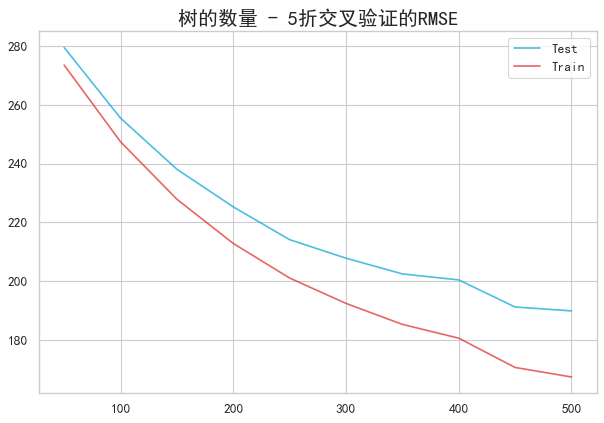

In [ ]:
plt.figure(figsize=(9,6),dpi=80)
plt.plot(range(50,550,50),cv_test,color="#01a2d9",alpha=0.7,label="Test")
plt.plot(range(50,550,50),cv_train,color="#dc2624",alpha=0.7,label="Train")
plt.legend()
sns.set(style="whitegrid",font="simhei", font_scale=1.1)
plt.title("树的数量 - 5折交叉验证的RMSE",fontsize=18)
plt.show()

可以发现，随着num_boost_round的上升，模型开始逐渐出现了一些过拟合的症状。我们可以通过先调整学习率来试图改善过拟合的情况：

In [ ]:
cv_train = []
cv_test = []
for eta in np.linspace(0.1,0.5,10):
    params = {"objective":"reg:squarederror"
              ,"eta":eta
              ,"seed":1412} #随机数种子
    result = xgb.cv(params,data,num_boost_round=100,nfold=5,seed=1412)
    cv_test.append(result.iloc[-1,-2])
    cv_train.append(result.iloc[-1,0])
    print("completed {}".format(eta))

completed 0.1
completed 0.14444444444444446
completed 0.18888888888888888
completed 0.23333333333333334
completed 0.2777777777777778
completed 0.32222222222222224
completed 0.3666666666666667
completed 0.4111111111111111
completed 0.4555555555555556
completed 0.5


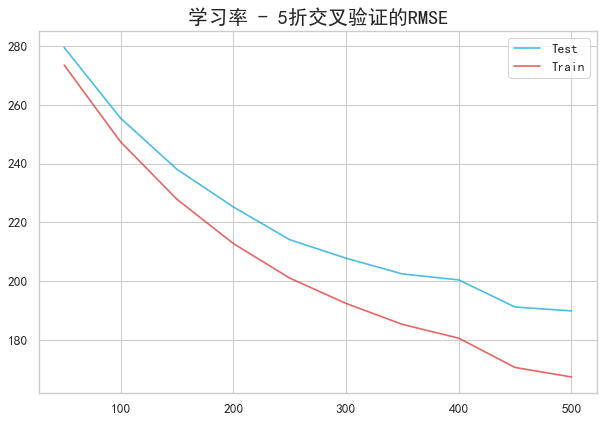

In [ ]:
plt.figure(figsize=(9,6),dpi=80)
plt.plot(range(50,550,50),cv_test,color="#01a2d9",alpha=0.7,label="Test")
plt.plot(range(50,550,50),cv_train,color="#dc2624",alpha=0.7,label="Train")
plt.legend()
sns.set(style="whitegrid",font="simhei", font_scale=1.1)
plt.title("学习率 - 5折交叉验证的RMSE",fontsize=18)
plt.show()

- **verbosity**

由于xgboost的训练流程一般较长，因此xgboost在早期就提供了自动监控训练流程的参数。在最早的版本中该参数为silent，后来经过更新变成了今天的verbosity。然而，经过改进之后的verbosity更倾向于帮助我们打印建树相关的信息，而不像原来的silent一样帮助我们展示训练过程中的模型评估信息，因此verbosity现在不那么实用了。

我们可以在verbosity中设置数字[0,1,2,3]，参数默认值为1。

- 0：不打印任何内容
- 1：表示如果有警告，请打印警告
- 2：请打印建树的全部信息
- 3：我正在debug，请帮我打印更多的信息。

我们来看看具体的打印内容：

In [ ]:
params = {"objective":"reg:squarederror"
         ,"eta":0.3
         ,"verbosity":1 #如果有警告就打印警告，没有警惕则不打印任何内容
         ,"seed":1412} #随机数种子
reg = xgb.train(params,data,num_boost_round=10)

In [ ]:
params = {"objective":"reg:squarederror"
         ,"eta":0.3
         ,"verbosity":2 #打印进度
         ,"seed":1412} #随机数种子
reg = xgb.train(params,data,num_boost_round=10)

[16:47:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/tree/updater_prune.cc:101: tree pruning end, 114 extra nodes, 0 pruned nodes, max_depth=6
[16:47:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/tree/updater_prune.cc:101: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=6
[16:47:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/tree/updater_prune.cc:101: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=6
[16:47:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/tree/updater_prune.cc:101: tree pruning end, 116 extra nodes, 0 pruned nodes, max_depth=6
[16:47:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/tree/updater_prune.cc:101: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=6
[16:47:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/tree/updater_prune.cc:101: tree pruning end, 124 extra nod

In [ ]:
params = {"objective":"reg:squarederror"
         ,"eta":0.3
         ,"verbosity":3
         ,"seed":1412} #随机数种子
reg = xgb.train(params,data,num_boost_round=10)

[16:47:57] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/gbm/gbtree.cc:155: Using tree method: 2
[16:47:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/tree/updater_prune.cc:101: tree pruning end, 114 extra nodes, 0 pruned nodes, max_depth=6
[16:47:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/tree/updater_prune.cc:101: tree pruning end, 124 extra nodes, 0 pruned nodes, max_depth=6
[16:47:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/tree/updater_prune.cc:101: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=6
[16:47:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/tree/updater_prune.cc:101: tree pruning end, 116 extra nodes, 0 pruned nodes, max_depth=6
[16:47:57] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/tree/updater_prune.cc:101: tree pruning end, 122 extra nodes, 0 pruned nodes, max_depth=6
[16:47:57] INFO: 

- **missing**与**num_parallel_tree**

xgboost作为独立于sklearn的机器学习算法库，一直有着两个美誉：

> 1. xgboost可以自动处理缺失值，无需进行填补
> 2. xgboost可以并行建树，因此计算速度很快

这两个美誉分别指向我们的参数missing与num_parallel_tree，但这两个参数的实际应用方式与大家的想象有些不同。先来说简单的参数num_parallel_tree。在num_parallel_tree当中，我们可以输入一个数字，表示允许并行建立的树的数量。当我们不输入任何数字的时候，xgboost库会按照算力进行最大程度的并行。**然而，这种并行功能对论文中描述的xgboost无效，只能被用于使用xgboost库建立随机森林的时候**。随机森林作为bagging算法，天生就可以并行建立树，因此能够并行建树的并不是xgboost，而是xgboost库下的随机森林。

当然，xgboost算法本身也的确实现了速度的提升。虽然根据boosting的原理，树必须是一棵一棵建立的，**但对不同特征的分枝却是可以并行的**。xgboost在原理上实现并行分枝，因此建立每一棵树的速度都比其他集成算法更快。不过，这种并行是xgboost默认的，没有任何的参数可以帮助我们控制这种行为。

接下来来看参数missing，虽然xgboost处理缺失值的能力被传得神乎其神，但实际上，**只要代码允许，任意树模型都可以忍受特征有缺失的数据**。虽然这有些反常识，但树模型的预测结果与特征值本身关系并不大，因为所有叶子上的输出都是依赖于标签进行推导的，特征["A","A","A","B","B"]和特征[1,1,1,2,2]在决策树看来是完全一样的内容。这也是决策树对数据预处理的要求如此之低的关键原因。

来看一个基本的以MSE为criterion进行分枝的例子：

In [ ]:
#假设现在对一个特征进行分枝，数据中总共有5个样本
#y_true是5个样本的真实标签
#y_parent是现在的父节点上输出的预测标签，分枝一定是从一个父节点分成两个子节点，因此父节点上的输出一定要存在
#假设父节点就是决策树的根节点
y_true = np.array([[0],[5],[30],[10],[10]])
y_parent = np.array([[11],[11],[11],[11],[11]])

**<center>平方误差的不纯度下降量</center>**
<center>$\frac{\sum_p{(r_i - \hat{y_i})^2}}{w_l + w_r} - (\frac{w_l}{w_l+w_r} * \sum_l{(r_i - \hat{y_i})^2} + \frac{w_r}{w_l+w_r} * \sum_r{(r_i - \hat{y_i})^2})$<br></center><br>


In [ ]:
SamplesInParent = 5
for i in range(1,SamplesInParent):
    #打印分枝的可能性
    print("left:{},right:{}".format(i,SamplesInParent-i))
    
    #计算左右叶子节点上的样本量，也就是不纯度下降量公式中的权重
    w_left = i
    w_right = SamplesInParent-i
    
    #父节点上的总MSE
    parentMSE = ((y_true - y_parent)**2).sum()
    
    #计算左右叶子节点上的输出：对回归树来说，就是当前叶子节点上所有样本的真实标签的均值
    y_left = y_true[:i].mean()
    y_right = y_true[i:].mean()
    
    #计算左右叶子节点上的MSE
    leftsum = ((y_true[:i] - y_left)**2).sum()
    rightsum = ((y_true[i:] - y_right)**2).sum()
    
    #加权求和左右叶子节点上的MSE
    childMSE = leftsum*w_left/SamplesInParent + rightsum*w_right/SamplesInParent
    
    print("\t improvement in MSE:{:.3f}".format(parentMSE - childMSE))

left:1,right:4
	 improvement in MSE:225.000
left:2,right:3
	 improvement in MSE:355.000
left:3,right:2
	 improvement in MSE:210.000
left:4,right:1
	 improvement in MSE:105.000


依据MSE下降的结果，父节点子节点MSE差异最大的分枝是左2右3。你发现了，**这个分枝过程当中，完全没有用到任何的特征值**。所以处理缺失值是决策树天生的能力，只不过在sklearn当中，数据可靠性检验的时候不允许有缺失，因此任何算法都无法处理缺失值。在xgboost当中就没有这么严格的可靠性检验，即便数据的特征缺失，还是可以根据标签继续进行分枝计算的。对于xgboost具体是如何处理缺失值的，原作者团队都有一些争议。在xgboost官网上，明确说到有缺失的样本会被删除(removed)，但陈天齐和其他团队成员曾在社交网络上评论说，xgboost不会删除带有缺失值的样本，而会直接根据训练中标签的分枝结果，将带有缺失的样本分到相应的叶子节点上。

根据官网的说明，参数missing可以控制一部分缺失值的处理，**在missing当中我们可以输入任何字符串或数字，xgboost会将数据中任意特征量等于missing参数值的样本删除**。这是说，当我们让missing=1时，数据中任意特征值为1的样本都会被删除，所以missing这个参数的默认值是np.nan。

XGBoost其实是一个非常复杂的算法，为了能够在直播中快速实现参数的调用，我们对于参数本身和许多原理都讲解得很浅显。在《2021机器学习实战》正课当中，我们将详细地剖析XGBoost的各项原理与参数具体应用方法。

****

# **二、LGBM的应用**

LGBM是Light Gradient Boosting Machine的缩写，译作轻量梯度提升机器，是最初由Microsoft开发的用于机器学习的免费开源分布式梯度提升框架。和XGBoost一样，LGBM也是在GBDT的基础上改进得来，同时它还借鉴了一些xgboost的思想、集成了一些xgboost的建树和数据处理流程。

|年份|算法/理论|成就/改进|
|----|----|-----|
|2000|GBDT<br>在ADB基础上改进|更新损失函数$L(x,y)$，在数学流程上推广到任意可微函数<br>放弃调整数据分布、放弃弱分类器权重<br>自适应地调整**后续弱评估器拟合的目标**|
|2014|XGBoost<br>在GBDT基础上改进|更新损失函数$L(x,y)$，在损失函数中加入正则项<br>改进弱评估器$f(x)$生长规则，自适应地**调整后续弱评估器的结构**<br>改进拟合中的数学过程，提升拟合精度<br>首次在工程上实现了树分枝的并行，提升运算速度<br>支持GPU加速|
|2016|LGBM<br>在GBDT基础上改进<br>受XGBoost启发|改进弱评估器$f(x)$生长规则，自适应地**调整后续弱评估器的结构**<br>设计了适合于GBDT的数据分布调整方式GOSS，自适应地**调整数据分布**<br>设计了加速弱分类器分枝的计算方式EFB，在工程上大幅度降低了运算时间与内存消耗<br>支持GPU加速|

和xgboost一样，作为独立于sklearn算法库的算法框架，lgbm需要单独进行安装。lgbm的官方页面提供了异常复杂的安装方式（https://lightgbm.readthedocs.io/en/latest/Installation-Guide.html#windows）

我们可以使用pip进行安装。除非你pip安装出现问题，否则无需参考官方文档。在pip安装lightgbm之前，确认你的pip版本足够，同时确定你已经安装了wheel包来支持你的lgbm。

In [ ]:
!pip install wheel

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
#实例化，fit，score/predict
#定义参数，train，predict

lgbm的参数设置方式、训练方式与xgboost类似，都是通过先定义参数、再直接调用函数的方式进行训练，同时参数也是直接通过字典形式进行设置。不过，lgm在超参数数量上比xgboost更加夸张、整体库的灵活性也更强。来看这长长的参数列表：https://lightgbm.readthedocs.io/en/latest/Parameters.html#core-parameters

In [ ]:
import pandas as pd
data = pd.read_csv("公开课sample_data2.csv",index_col=0)
data.head()

,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,商品销售数量,订单渠道,支付方式,下单用户ID,城市,异常,订单金额
0,14.0,5.0,1.0,15907.0,227.0,41.0,1.0,0.0,24870.0,5.0,1,3009.0
1,14.0,11.0,1.0,15431.0,1551.0,40.0,1.0,0.0,50713.0,207.0,1,2970.0
2,10.0,2.0,1.0,18402.0,2049.0,40.0,1.0,0.0,46259.0,133.0,1,621.0
3,23.0,5.0,1.0,19080.0,377.0,40.0,1.0,0.0,62154.0,101.0,0,1499.0
4,16.0,3.0,1.0,18580.0,748.0,40.0,1.0,0.0,56469.0,223.0,0,2799.0


In [ ]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

traindata = lgb.Dataset(X,y) #lgbm, xgboost, pytorch, tf
param = {"seed":1412} #只设计一个参数seed，控制随机性
reg = lgb.train(param,traindata) #自动打印信息，同时默认的树的数量是100

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 131282, number of used features: 11
[LightGBM] [Info] Start training from score 784.113062


这段警告信息与lgbm中独有的分枝方式相关。在普通决策树、Adaboost、GBDT当中，我们是基于不纯度指标的下降量进行分枝，在xgboost当中我们是基于结构分数相关的技术进行分枝，在lgbm当中，我们使用特征或样本的直方图相关的计算作为指标进行分枝，并且**必须在两个方向中二选一**。

![](http://pbarmby.github.io/stuff/python-operations-across-axes.svg)

当我们不在参数设置中进行选择时，算法会分别对特征以及样本方向进行测试、并自动帮我们选择**运行更快**的分枝方式，而这种自动测试需要消耗一定的算力和内存。因此当我们不明确直方图的计算方向时，就会出现警告。我们可以通过在参数中明确行方向或列方向的计算，来让警告消失。

但需要注意的是，行方向的直方图运算一般会比列方向更消耗内存（对于一个样本而言，特征可能有众多不同的取值，对于一个特征而言，不同样本的取值却一定在某个范围之内），因此当内存不足时，我们最好选择列方向进行计算。

In [ ]:
param = {"seed":1412, "force_col_wise":True} #也可设置"force_row_wise":True
reg = lgb.train(param,traindata,num_boost_round=10)

[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 131282, number of used features: 11
[LightGBM] [Info] Start training from score 784.113062


In [ ]:
y_pred = reg.predict(X) #注意，lgbm的预测方法predict不接受lgbm自己的Dataset类输出的数据，这里需要输入原始数据

In [ ]:
#对回归类算法，xgboost的默认评估指标是RMSE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
MSE(y,y_pred,squared=False) #RMSE

443.2225735673391

In [ ]:
r2_score(y,y_pred)

0.6003591113819646

In [ ]:
#使用交叉验证的方式进行训练
param = {"seed":1412, "metric":"rmse", "force_col_wise":True} #seed 树的生长与树的分枝
result = lgb.cv(param, traindata, nfold=5,num_boost_round=10, seed=1412, stratified=False) #seed 交叉验证时抽样数据

[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 105024, number of used features: 11
[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 105024, number of used features: 11
[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 105024, number of used features: 11
[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 105024, number of used features: 11
[LightGBM] [Info] Total Bins 1077
[LightGBM] [Info] Number of data points in the train set: 105024, number of used features: 11
[LightGBM] [Info] Start training from score 782.951640
[LightGBM] [Info] Start training from score 784.545123
[LightGBM] [Info] Start training from score 783.902346
[LightGBM] [Info] Start training from score 784.656650
[LightGBM] [Info] Start training from score 784.544523


在lgb.cv当中默认使用stratified方式进行交叉验证，对回归算法而言无意义。stratified是针对分类算法在kfold基础上进行的调整。在分类数据当中，但每个类别的样本不均匀时，stratified可以保证每份交叉验证数据中，标签的类别分布都与全数据一致。对于回归算法，stratified=True则会报警告，因为回归类算法没有标签类别可以进行分割。

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_003.png)

In [ ]:
result #返回得结果是一个字典

{'rmse-mean': [656.7002983721297,
  618.1214417392637,
  585.5066804103315,
  556.7414956670689,
  531.7723985179118,
  509.9581911986176,
  490.5970023571971,
  473.5412509284878,
  458.0448343899362,
  445.1964224364686],
 'rmse-stdv': [1.3591508729056094,
  1.04231331407306,
  0.6404904145973013,
  0.6992338424111273,
  1.1922714373463599,
  0.9834655846046572,
  1.361098573472867,
  1.313306601489577,
  1.865060767266364,
  1.3486957828693686]}

In [ ]:
result = pd.DataFrame(result) #只返回测试集上的结果

In [ ]:
result #RMSE - 根均方误差，STDV - 标准差，#建立10棵树的过程中，每次迭代完毕之后的5次交叉验证的平均RMSE和stdv

,rmse-mean,rmse-stdv
0,656.700298,1.359151
1,618.121442,1.042313
2,585.506680,0.640490
3,556.741496,0.699234
4,531.772399,1.192271
5,509.958191,0.983466
6,490.597002,1.361099
7,473.541251,1.313307
8,458.044834,1.865061
9,445.196422,1.348696


100棵树上的结果均方误差是278.377，比xgboost高了许多。但从数据的运行速度来看，lgbm是目前为止我们所使用的所有集成算法当中最快的。

与xgboost相似，lgbm也提供了基于sklearn的API运行方式，分别有以下四个：

In [ ]:
from lightgbm import LGBMModel, LGBMClassifier, LGBMRegressor, LGBMRanker

我们以LGBMRegressor为例查看一下模型的参数：

*class* `lightgbm.LGBMRegressor`(boosting_type, num_leaves, max_depth, learning_rate, n_estimators, subsample_for_bin, objective, class_weight, min_split_gain, min_child_weight, min_child_samples, subsample, subsample_freq, colsample_bytree, reg_alpha, reg_lambda, random_state, n_jobs, silent, importance_type, **kwargs)

其中的大部分参数看起来都非常熟悉，例如n_estimators, learning_rate, objective, subsample。当然，与XGBoost相同，lgbm当中有许多功能只有在原生代码中才能够实现。之后我们就在原生代码上详细地讲解我们的参数。

In [ ]:
reg = LGBMRegressor(n_estimators=100,random_state=1412)
cv = KFold(n_splits=5,shuffle=True,random_state=1412)

In [ ]:
result = CSV(reg,X,y,cv=cv,scoring="neg_mean_squared_error")

In [ ]:
(abs(result)**0.5).mean()

278.1041099194505

In [ ]:
(abs(result)**0.5).var()

9.546768918499128

- **四大集成模型调参总览**

★★★ 一定要调整，调整之后有很大的概率可以提升模型表现<br>
★★ 可以调整，有机会提升模型表现<br>
★ 只能微调，模型表现几乎不会有太大变化<br>
--- 完全无法无法调整<br>

|算法|样本均衡|树数量&学习率|过拟合<br>(弱学习器&损失函数)|过拟合<br>(随机性)|过拟合<br>(提前停止)||
|---|---|---|---|---|---|---|
|GBDT|---|★★★<br>n_estimators<br>learning_rate|★<br>max_depth<br>min_samples_split<br> min_samples_leaf|★★★<br>max_features<br>subsample|★★<br>n_iter_no_change|
|XGB|★<br>scale_postive_weight=1|★★★<br>num_boost_round<br>eta|★<br>max_depth<br>lambda<br>alpha|★★★<br>num_feature<br>subsample<br>★★<br>colsample_bytree<br> colsample_bylevel<br> colsample_bynode|★★<br>early_stopping_round|
|LGBM|★<br>scale_postive_weight=1|★★★<br>num_boost_round<br>eta|★★★<br>max_depth<br>lambda_l1<br> lambda_l2<br>★★<br>min_data_in_leaf<br>max_delta_step|★★★<br>feature_fraction<br>bagging_fraction<br>|★★<br>early_stopping_round|
|RF|★★★<br>class_weight=None|★★★<br>n_estimators<br>learning_rate|★★★<br>max_depth<br>★<br>min_samples_split<br>min_samples_leaf|★★★<br>subsample<br>★★<br>max_features='auto'|---|

# **二、模型融合**

模型融合是当代机器学习集成方法中最为关键的提效手段之一。通过融合多个强学习器，我们可以大幅修正单一算法在偏差和方差方面的问题：当单一算法在一个样本上的偏差较高时（MSE高、准确率低），我们可以通过其他算法在该样本上的预测结果来修正这种高偏差；当单一算法在不同数据上的方差较大时，我们可以借助其他稳定的模型来消除单一算法的大方差带来的影响。在boosting思想诞生之前，模型融合的许多经典方法就已经诞生了，甚至可以说bagging装袋法也是融合思想的结晶之一。现在，使用比较广泛的融合方式有以下几种：

- **均值法Averaging**
> - 将所有算法的结果普通平均、加权平均
> - 我们可以从数学上证明，当各个强学习器相互独立时，强学习期平均后的误差一定是小于单一学习器的误差的
> - 需要注意，加权平均与普通平均的效果不相上下，有时候加权平均还会加重过拟合，因此我们更偏好于使用普通平均
- **投票法Voting**
> - 包含绝对多数投票（例如：50%投票）、相对多数投票（硬投票法）、加权投票法、软投票法等各类投票方法，仅仅适用于分类数据。<br>
> - 绝对多数投票要求样本的其中一个类别至少占比50%以上，如果没有占比50%以上的类别，则拒绝预测，输出空值<br>
> - 相对多数投票就是最简单的少数服从多数<br>
> - 软投票则是根据各强学习期输出的概率之和少数服从多数
- **堆叠法Stacking**
> - 建立一个元学习器与一个/多个个体学习器，将原始数据分为train与test。使用train训练个体学习器，并使用个体学习器(们)在train上的某种输出/中间结果，作为元学习器的训练数据，最终让元学习器在test上输出结果。
> - 如果只有一个个体学习器，则会执行交叉验证得出多组输出结果来作为元学习器的训练数据
> - 最著名的stacking法应用是逻辑回归+GBDT，其中逻辑回归是个体学习器，GBDT是元学习器，GBDT使用逻辑回归的输出概率作为训练数据。也可以使用决策树作为个体学习器，元学习器可以使用决策树中的叶子索引、树结构、重要性指标或者输出结果作为训练数据。
- **混合法Blending**
> - Blending是一种特殊的Stacking
> - 建立一个元学习器与一个/多个个体学习器，将原始数据分为train，validation与test，使用train训练个体学习器，并使用个体学习器(们)在validation上的某种输出/中间结果，作为元学习器的训练数据，最终让元学习器在test上输出结果。

在sklearn中，我们可以轻松地使用下面的类来实现平均、投票与堆叠法。截止到2021年11月7日，sklearn还不支持blending方法。

*class* `sklearn.ensemble.VotingRegressor`(estimators, *, weights=None, n_jobs=None, verbose=False)<br>

*class* `sklearn.ensemble.VotingClassifier`(estimators, *, voting='hard', weights=None, n_jobs=None, flatten_transform=True, verbose=False)<br>

回归类投票法就是平均法，我们可以使用weights参数来输入权重，当指定权重时，就是加权平均法。VotingClassifier就是分类算法使用的投票法，我们可以使用voting参数调节硬投票与软投票，weights来指定权重。

*class* `sklearn.ensemble.StackingClassifier`(estimators, final_estimator=None, *, cv=None, stack_method='auto', n_jobs=None, passthrough=False, verbose=0)<br>

*class* `sklearn.ensemble.StackingRegressor`(estimators, final_estimator=None, *, cv=None, n_jobs=None, passthrough=False, verbose=0)<br>

Stacking可以用于分类和回归，只要元学习器的输出是相应的分类/回归输出即可。

对于我们当下的问题和数据，我们可以尝试使用VotingRegressor对GBDT、XGB和LGBM进行融合。**但需要注意的是，sklearn中的融合工具只支持sklearn中的评估器，不支持xgb、lgbm的原生代码**。因此，如果我们想要对原生代码下的模型进行融合，必须自己手写融合过程。

考虑到模型融合的逻辑并不复杂，手写融合过程并不是一个很有挑战性的工作。不过，我们也可以选择直接使用xgboost与lgbm的sklearn API来建立模型，这样就可以将模型打包在sklearn的融合工具中进行融合了。

## **建立三个评估器（sklearn API），并分别查看交叉验证下的结果**

In [12]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.model_selection import cross_val_score as CSV
from sklearn.model_selection import KFold
#import lightgbm as lgb
#import xgboost as xgb、
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import pandas as pd
from time import time

In [13]:
data = pd.read_csv("公开课sample_data2.csv",index_col=0)
data.head()

,下单时间,商品一级类别,商品所属渠道,商品ID,品牌,商品销售数量,订单渠道,支付方式,下单用户ID,城市,异常,订单金额
0,14.0,5.0,1.0,15907.0,227.0,41.0,1.0,0.0,24870.0,5.0,1,3009.0
1,14.0,11.0,1.0,15431.0,1551.0,40.0,1.0,0.0,50713.0,207.0,1,2970.0
2,10.0,2.0,1.0,18402.0,2049.0,40.0,1.0,0.0,46259.0,133.0,1,621.0
3,23.0,5.0,1.0,19080.0,377.0,40.0,1.0,0.0,62154.0,101.0,0,1499.0
4,16.0,3.0,1.0,18580.0,748.0,40.0,1.0,0.0,56469.0,223.0,0,2799.0


In [14]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1] #标签是订单金额
cv = KFold(n_splits=5,shuffle=True,random_state=1412)

> **GBR**

In [15]:
gbr = GBR(n_estimators=100,random_state=1412)

In [33]:
start = time()
result_gbr = CSV(gbr,X,y,cv=cv,scoring="neg_mean_squared_error",n_jobs=-1)
print(f'时间：{time()-start}\n平均值：{(abs(result_gbr)**0.5).mean()}\n方差：{(abs(result_gbr)**0.5).var()}')

时间：16.191166400909424
平均值：396.96524429050487
方差：11.218087827112537


In [18]:
(abs(result_gbr)**0.5).mean()

396.96524429050487

In [19]:
(abs(result_gbr)**0.5).var()

11.218087827112537

> **LGBM**

In [28]:
lgbm = LGBMRegressor(n_estimators=100,random_state=1412,force_col_wise=True,metric="rmse")
start = time()
result_lgb = CSV(lgbm,X,y,cv=cv,scoring="neg_mean_squared_error")
print(f'时间：{time()-start}\n平均值：{(abs(result_lgb)**0.5).mean()}\n方差：{(abs(result_lgb)**0.5).var()}')

时间：1.9736049175262451
平均值：278.1041099194505
方差：9.546768918499128


In [165]:
(abs(result_lgb)**0.5).mean()

278.1041099194505

In [166]:
(abs(result_lgb)**0.5).var()

9.546768918499128

> **XGBoost**

In [34]:
xgb_reg = XGBRegressor(n_estimators=100,random_state=1412)
start = time()
result_xgb = CSV(xgb_reg,X,y,cv=cv,scoring="neg_mean_squared_error")
print(f'时间：{time()-start}\n平均值：{(abs(result_xgb)**0.5).mean()}\n方差：{(abs(result_xgb)**0.5).var()}')


时间：14.850860595703125
平均值：210.87126054622726
方差：9.870540394847437


In [169]:
(abs(result_xgb)**0.5).mean()

210.87126054622726

In [170]:
(abs(result_xgb)**0.5).var()

9.870540394847437

|算法(100棵树)|RMSE|方差|
|----|----|----|
|GBDT|396.965|11.2180|
|LGBM|278.377|9.5467|
|XGB|210.871|9.8704|

## **使用最简单的平均法进行融合**  
回归类投票法就是平均法

In [36]:
from sklearn.ensemble import VotingRegressor

#需要以元组的列表方式来构建estimators
gbr = GBR(n_estimators=100,random_state=1412)
lgbm = LGBMRegressor(n_estimators=100,random_state=1412,force_col_wise=True,metric="rmse")
xgb_reg = XGBRegressor(n_estimators=100,random_state=1412)

estimators = [("GBR",gbr),("LGBM",lgbm),("XGB",xgb_reg)]
mix = VotingRegressor(estimators,verbose=True) # vervose监控过程
cvresult = CSV(mix,X,y,cv=cv,scoring="neg_mean_squared_error")

[Voting] ...................... (1 of 3) Processing GBR, total=  17.0s
[Voting] ..................... (2 of 3) Processing LGBM, total=   0.9s
[Voting] ...................... (3 of 3) Processing XGB, total=   6.3s
[Voting] ...................... (1 of 3) Processing GBR, total=  16.6s
[Voting] ..................... (2 of 3) Processing LGBM, total=   0.6s
[Voting] ...................... (3 of 3) Processing XGB, total=   5.6s
[Voting] ...................... (1 of 3) Processing GBR, total=  17.0s
[Voting] ..................... (2 of 3) Processing LGBM, total=   0.6s
[Voting] ...................... (3 of 3) Processing XGB, total=   5.2s
[Voting] ...................... (1 of 3) Processing GBR, total=  16.2s
[Voting] ..................... (2 of 3) Processing LGBM, total=   0.7s
[Voting] ...................... (3 of 3) Processing XGB, total=   5.4s
[Voting] ...................... (1 of 3) Processing GBR, total=  16.4s
[Voting] ..................... (2 of 3) Processing LGBM, total=   0.6s
[Votin

In [37]:
(abs(cvresult)**0.5).mean() # 平均RMSE均越小，越准确

276.5967460613563

In [38]:
(abs(cvresult)**0.5).var() # 方差越小，预测结果波动性越小

9.56818862007965

|算法(100棵树)|RMSE|方差|
|----|----|----|
|GBDT|396.965|11.2180|
|LGBM|278.377|9.5467|
|XGB|210.871|9.8704|

你发现了吗？模型融合的结果还没有XGB单独的结果好，这是融合模型经常会出现的陷阱，也是大多数人掌握了代码，却没有真正懂得使用融合模型的关键原因。平均融合的效果好于单一评估器的效果是有前提的：

- 评估器是精调之后的强学习器
- 被融合的评估器在交叉验证上的分数差异不大
- 评估器与评估器之间是相互独立的

**在满足了这三个条件之后，融合模型的效果才可能好于单一集成算法。其中第一个条件可以通过精调来完成，第二个条件需要看模型能够达到的水平，如果存在RMSE过高或者准确率过低的单一模型，我们则需要在融合的时候放弃该模型。第三个条件则需要通过集成算法当中的随机性来控制：使用随机性参数，令评估器之间的差异越大，评估器之间就越相互独立。**

我们来看看具体的操作：

In [40]:
gbr = GBR(n_estimators=300 #增加n_estimators，增加模型的学习能力
          ,learning_rate=0.5 #加速迭代，调大学习率
          ,max_features=0.6 #控制每次建树时能够使用的特征量，以此来让GBDT中树的差异变大，这可能会加大交叉验证结果的方差
          ,random_state=1412
          )

In [42]:
start = time()
result_gbr = CSV(gbr,X,y,cv=cv,scoring="neg_mean_squared_error",n_jobs=-1)
print(time()-start)

54.60277199745178


In [43]:
(abs(result_gbr)**0.5).mean()

243.57883448638546

In [44]:
(abs(result_gbr)**0.5).var() # 加入随机性后 方差肯定会变大 模型不稳定

12.566177233188109

> **LGBM**

In [45]:
lgbm = LGBMRegressor(n_estimators=200
                     ,learning_rate=0.5 #同样提升树的数量和学习率
                     ,random_state=1412
                     ,force_col_wise=True
                     ,colsample_bytree=0.6 #每次建树时随机抽取特征进行建树
                     ,metric="rmse")

In [47]:
start = time()
result_lgb = CSV(lgbm,X,y,cv=cv,scoring="neg_mean_squared_error",n_jobs=-1)
print(time()-start)

5.325506210327148


In [48]:
(abs(result_lgb)**0.5).mean()

209.79153535802192

In [49]:
(abs(result_lgb)**0.5).var()

12.57142210188055

> **XGBoost**

In [50]:
xgb_reg = XGBRegressor(n_estimators=100
                       ,learning_rate=0.5
                       ,colsample_bytree=0.6
                       ,random_state=1412)
start = time()
result_xgb = CSV(xgb_reg,X,y,cv=cv,scoring="neg_mean_squared_error",n_jobs=-1)
print(time()-start)

In [52]:
(abs(result_xgb)**0.5).mean()

200.84104520043624

In [53]:
(abs(result_xgb)**0.5).var()

6.58760884445049

|算法(精调+加入随机性之后)|RMSE|方差|
|----|----|----|
|GBDT|243.578|12.5661|
|LGBM|209.791|12.5714|
|XGB|200.841|6.587|

会发现，现在GBDT与剩下两个算法的差异太大，把GBDT也加入融合或许不是一个很好的选择。我们可以分别融合一下三个模型以及两个模型，看一下最终的结果：

### 3个模型


In [55]:
estimators = [("GBDT",gbr),("LGBM",lgbm),("XGB",xgb_reg)]
mix = VotingRegressor(estimators,verbose=True)
start = time()
cvresult = CSV(mix,X,y,cv=cv,scoring="neg_mean_squared_error",n_jobs=-1)
print(f'时间：{time()-start}\n平均值：{(abs(cvresult)**0.5).mean()}\n方差：{(abs(cvresult)**0.5).var()}')

时间：52.506831884384155
平均值：200.93284635947438
方差：4.660882490269849


In [202]:
(abs(cvresult)**0.5).mean()

200.93284635947438

In [203]:
(abs(cvresult)**0.5).var()

4.660882490269849

### 2个模型

In [56]:
estimators = [("LGBM",lgbm),("XGB",xgb_reg)]
mix = VotingRegressor(estimators,verbose=True)
cvresult = CSV(mix,X,y,cv=cv,scoring="neg_mean_squared_error",n_jobs=-1)
print(f'时间：{time()-start}\n平均值：{(abs(cvresult)**0.5).mean()}\n方差：{(abs(cvresult)**0.5).var()}')

时间：74.12823843955994
平均值：192.4772815119236
方差：5.257916642365961


In [57]:
(abs(cvresult)**0.5).mean()


192.4772815119236

In [58]:
(abs(cvresult)**0.5).var()

5.257916642365961